In [1]:
%matplotlib inline

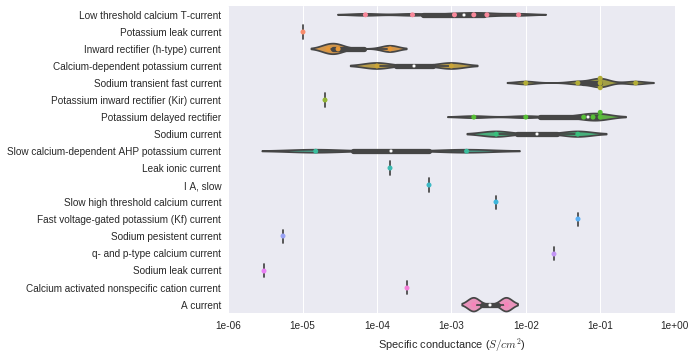

In [2]:
# General imports
import sys, os
import matplotlib.pylab as plt
import seaborn as sns
import quantities as pq
import numpy as np

# Imports from NeuroCurator code base
sys.path.append(os.path.join(os.getcwd(), ".."))
from annotationSearch import ParameterSearch, ConditionAtom
from qtNeurolexTree import TreeData

# Searching for annotations
searcher = ParameterSearch()
searcher.setSearchConditions(ConditionAtom("Parameter name", "conductance_ion_curr_max"))
searcher.expandRequiredTags = True
searcher.onlyCentralTendancy = True
resultDF = searcher.search()

# Checking which conductances have been specified as "specific conductances"
# (i.e., conductance densities) and normalizing the units.
isSpecific = []
allConductances = []
for v, u in zip(resultDF["Values"], resultDF["Unit"]):
    try:
        allConductances.append(float(pq.Quantity(v, u).rescale('S/cm**2')))
        isSpecific.append(True)
    except:
        isSpecific.append(False)

resultDF = resultDF[isSpecific]
resultDF["Values"] = np.log10(allConductances)

# Plotting a violin plot for annotated values for specific conductances
# of the various kind of ionic currents 
g = sns.violinplot(y="Transmembrane ionic current", x="Values", data=resultDF, bw=0.25)
g = sns.swarmplot( y="Transmembrane ionic current", x="Values", data=resultDF)
g.set_ylabel("")
g.set_xlabel("Specific conductance ($S/cm^2$)")
g.set_xticklabels([('%.0e' % 10**nb) for nb in g.get_xticks()]) 
plt.savefig('example_currents.png', bbox_inches='tight', transparent=True, dpi=200)

In [3]:
# Searching for annotations
searcher = ParameterSearch()
searcher.setSearchConditions(ConditionAtom("Parameter name", "conductance_ion_curr_max"))
searcher.expandRequiredTags = True
searcher.onlyCentralTendancy = True
resultDF = searcher.search()


In [5]:
import json
record = resultDF[resultDF["Transmembrane ionic current"] == "Fast voltage-gated potassium (Kf) current"]
print(json.dumps(record["obj_annotation"].values[0].toJSON(), 
                 sort_keys=True, indent=4, separators=(',', ': ')))

{
    "annotId": "8e3edae6-ef34-11e5-ba5d-c869cd917532",
    "authors": [
        "iavarone",
        "oreilly"
    ],
    "comment": "Fast potassium current parameters",
    "experimentProperties": [],
    "localizer": {
        "location": 26404,
        "text": "The gKIR and the\nfast voltage-gated potassium channel ( gKf) had conductances of 20 \u0002s/\ncm2 and 50 mS/cm2, respectively. Both potassium channels had reversal\npotentials of 100 mV.",
        "type": "text"
    },
    "parameters": [
        {
            "description": {
                "depVar": {
                    "typeId": "BBP-030003",
                    "values": {
                        "statistic": "raw",
                        "type": "simple",
                        "unit": "mS/cm^2",
                        "values": [
                            50.0
                        ]
                    }
                },
                "type": "pointValue"
            },
            "id": "e47c93ba-ffdc-1